# Unscented Transform & Sigma Points

The unscented transform provides a tool to compute approximately compute covariance matrices when propagated through a nonlinear function.

The `UT` is considered to be superior to other techniques such as using linearisation.

The material in this notebook is based on the article:

`a general method for approximating nonlinear transformations for probability distributions`, author: Simon Julier, Jeffrey Uhlmann

**motivivation**

Learn how to apply the unscented transform in the context of `Kalman`-filtering.

**overview**

The concept of sigma points and nonlinear transformation of sigma points is reviewed.

A numerical examples is provided. It shows the computation of covariance matrices from 

1) simulation

2) sigma points

3) local linearisation using the `Jacobian`-matrix



## Sigma points

A N dimensional random vector $\mathbf{x}$ has a covariance matrix $\mathbf{P}_{x,x}$.


$$
\mathbf{P}_{x,x} = E\left( \left(\mathbf{x} - \mathbf{\mu}_x \right) \cdot \left(\mathbf{x} - \mathbf{\mu}_x \right) ^T \right)
$$

In this equation we have used $\mathbf{\mu}_x = E\left(\mathbf{x} \right)$.

As covariance matrix (positive definite and symmetric) $\mathbf{P}_{x,x} $ can be decomposed into a product via `Cholesky`-decomposition:


$$
\mathbf{P}_{n,n} = \mathbf{L} \cdot \mathbf{L}^T = \sqrt{\mathbf{P}_{x,x}} \cdot \sqrt{\mathbf{P}_{x,x}}^T
$$

In many articles $\sqrt{\mathbf{P}_{x,x}}$ is referred to as *square root* of $\mathbf{P}_{x,x}$. This naming convention a bit misleading however.

| vector | description |
|--------|-------------|
| $\mathbf{\sigma}_i$ | i'th column vector of $+\sqrt{\left(N + \kappa \right) \cdot \mathbf{P}_{x,x}}$ for $ 1 \le i \le N$ |
| $\mathbf{\sigma}_i $ | (i - N)'th column vector of $-\sqrt{\left(N + \kappa \right) \cdot \mathbf{P}_{x,x}}$ for $ N+1 \le i \le 2N$ |

Let $\sqrt{\mathbf{P}_{x,x}}_{(i)}$ denote the i'th columns vector of matrix $\sqrt{\mathbf{P}_{x,x}}$. We then express $\mathbf{\sigma}_i$ by:

$$\begin{align}
\mathbf{\sigma}_i &= +\sqrt{N + \kappa } \cdot \sqrt{\mathbf{P}_{x,x}}_{(i)} \;\ for \ 1 \le i \le N \\
\mathbf{\sigma}_i &= -\sqrt{N + \kappa } \cdot \sqrt{\mathbf{P}_{x,x}}_{(i-N)} \;\ for \ N+1 \le i \le 2N
\end{align}
$$

And since $\mathbf{P}_{x,x}$ has been factorized by a `Cholesky` decomposition the i'th column vector $\sqrt{\mathbf{P}_{x,x}}_{(i)}$ is just the i'th column vector of matrix $\mathbf{L}$ which has been computed via this decomposition.

The number of sigma points is $2 \cdot N + 1$. A special case is $i=0$:

The first sigma point $i=0$ is the mean $\mathbf{\mu}_x$ of  vector $\mathbf{x}$.

$$
\mathbf{\chi_0} = \mathbf{\mu}_x \ ;\ \in \mathbb{R}^{N \times 1}
$$

The i`th sigma point ($i \gt 0$) is denoted by $\mathbf{\chi}_i$ :

$$
\mathbf{\chi}_i = \mathbf{\sigma}_i + \mathbf{\mu}_x
$$



**Note**

The square root of a symmetric matrix is again symmetric. $\sqrt{\left(N+\kappa\right) \cdot \mathbf{P}_{x,x}}$ has therefore an i'th row vector equal to the i'th column vector.



---



Expressing the covariance matrix $\mathbf{P}_{x,x}$ using sigma points.

$$
\mathbf{P}_{x,x} = \frac{1}{2\cdot (N+ \kappa)} \sum_{i=1}^{2N} \left(\mathbf{\chi}_i  - \mathbf{\mu}_x \right) \cdot \left(\mathbf{\chi}_i  - \mathbf{\mu}_x \right)^T
$$

**proof**

First we use $\mathbf{\chi}_i  - \mathbf{\mu}_x = \mathbf{\sigma}_i$ .

$$\begin{align}
 \frac{1}{2\cdot (N+ \kappa)} \sum_{i=1}^{2N} \left(\mathbf{\chi}_i  - \mathbf{\mu}_x \right) \cdot \left(\mathbf{\chi}_i  - \mathbf{\mu}_x \right)^T &=  \frac{1}{2\cdot (N+ \kappa)} \sum_{i=1}^{2N} \mathbf{\sigma}_i \cdot \mathbf{\sigma}_i^T \\
 &= \frac{1}{2\cdot (N+ \kappa)} 2 \cdot \sum_{i=1}^{N} \mathbf{\sigma}_i \cdot \mathbf{\sigma}_i^T = \frac{1}{N+ \kappa} \sum_{i=1}^{N} \mathbf{\sigma}_i \cdot \mathbf{\sigma}_i^T \\
 &= \frac{1}{N+ \kappa} \sum_{i=1}^{N} \sqrt{N + \kappa } \cdot \sqrt{\mathbf{P}_{x,x}}_{(i)} \cdot \sqrt{N + \kappa } \cdot \sqrt{\mathbf{P}_{x,x}}_{(i)}^T \\
 &= \sum_{i=1}^{N} \sqrt{\mathbf{P}_{x,x}}_{(i)} \cdot  \sqrt{\mathbf{P}_{x,x}}_{(i)}^T \\
 &= \mathbf{P}_{x,x}
 \end{align}
$$

## Nonlinear propagation

Each sigma point $\mathbf{\chi}_i \ for \ 0 \le i \le 2N$ is processed by a nonlinear function. The nonlinear function maps sigma points $\mathbf{\chi}_i$ to sigma points $\mathbf{\textit{Y}}_i$


$$
\mathbf{\textit{Y}}_i = \mathbf{g}(\mathbf{\chi}_i )
$$

The predicted mean output $\mathbf{\mu}_y$ is computed from equation:

$$
\mathbf{\mu}_y = \frac{1}{N+\kappa} \cdot \left(\kappa \cdot \mathbf{\textit{Y}}_0 + \frac{1}{2} \sum_{i=1}^{2N} \mathbf{\textit{Y}}_i  \right)
$$

In the original article is a typo ! Moreover no justification is given for this equation. 

Although this equation has been designed with a nonlinear dependency between $\mathbf{\textit{Y}}_i$ and $\mathbf{\chi}_i$ in mind it should give plausible results for the linear case. To explore this further we assume a linear relationship like this:

$$
\mathbf{\textit{Y}}_i  = \mathbf{F} \cdot \mathbf{\chi}_i + \mathbf{b}
$$

$$\begin{align}
\frac{1}{N+\kappa} \cdot \left(\kappa \cdot \mathbf{\textit{Y}}_0 + \frac{1}{2} \sum_{i=1}^{2N} \mathbf{\textit{Y}}_i  \right) &= \frac{1}{N+\kappa} \cdot \left(\kappa \cdot \left(\mathbf{F} \cdot \mathbf{\chi}_0 + \mathbf{b} \right) + \frac{1}{2} \sum_{i=1}^{2N} \left(\mathbf{F} \cdot \mathbf{\chi}_i + \mathbf{b} \right)  \right) \\
&= \frac{1}{N+\kappa} \cdot \left( \kappa \cdot \mathbf{F} \cdot \mathbf{\chi}_0 + \left(N + \kappa \right) \cdot \mathbf{b} + \frac{1}{2} \sum_{i=1}^{2N} \mathbf{F} \cdot \left(\mathbf{\sigma}_i + \mathbf{\mu}_x \right) \right) \\
&= \frac{1}{N+\kappa} \cdot \left( \kappa \cdot \mathbf{F} \cdot \mathbf{\mu}_x + \left(N + \kappa \right) \cdot \mathbf{b} + N \cdot \mathbf{F} \cdot \mathbf{\mu}_x + \frac{1}{2} \underbrace{\sum_{i=1}^{2N} \mathbf{F} \cdot \mathbf{\sigma}_i}_{\mathbf{0}} \right) \\
\mathbf{\mu}_y &= \mathbf{F} \cdot \mathbf{\mu}_x + \mathbf{b}
\end{align}
$$

This is the expected result. More importantly however it shows that the tuning parameter $\kappa$ can be chosen *arbitrarily* in the linear case.

**covariance matrix**

Again without justification the article provides an equation for the computation of the output covariance matrix $\mathbf{P}_{y,y}$.

$$
\mathbf{P}_{y,y} = \frac{1}{N+\kappa} \left( \kappa \cdot \left[\mathbf{\textit{Y}}_0 - \mathbf{\mu}_y  \right] \cdot \left[\mathbf{\textit{Y}}_0 - \mathbf{\mu}_y  \right]^T  + \frac{1}{2} \sum_{i=1}^{2N} \left[\mathbf{\textit{Y}}_i - \mathbf{\mu}_y  \right] \cdot \left[\mathbf{\textit{Y}}_i - \mathbf{\mu}_y  \right]^T \right)
$$

To confirm that this equation yields a plausible result for the linear case we will use again:

$$
\mathbf{\textit{Y}}_i  = \mathbf{F} \cdot \mathbf{\chi}_i + \mathbf{b}
$$

We analyse the expression:

$$
\frac{1}{N+\kappa} \left( \kappa \cdot \left[\mathbf{\textit{Y}}_0 - \mathbf{\mu}_y  \right] \cdot \left[\mathbf{\textit{Y}}_0 - \mathbf{\mu}_y  \right]^T  + \frac{1}{2} \sum_{i=1}^{2N} \left[\mathbf{\textit{Y}}_i - \mathbf{\mu}_y  \right] \cdot \left[\mathbf{\textit{Y}}_i - \mathbf{\mu}_y  \right]^T \right)
$$

For the linear case we have:

$$
\left[\mathbf{\textit{Y}}_0 - \mathbf{\mu}_y  \right] = \mathbf{0}
$$

So we only need to analyse:

$$
\frac{1}{N+\kappa} \left( \frac{1}{2} \sum_{i=1}^{2N} \left[\mathbf{\textit{Y}}_i - \mathbf{\mu}_y  \right] \cdot \left[\mathbf{\textit{Y}}_i - \mathbf{\mu}_y  \right]^T \right)
$$

For the term $\left[\mathbf{\textit{Y}}_i - \mathbf{\mu}_y  \right]$ we get:

$$\begin{align}
\left[\mathbf{\textit{Y}}_i - \mathbf{\mu}_y  \right] &= \mathbf{F} \cdot \mathbf{\chi}_i + \mathbf{b} - \mathbf{F} \cdot \mathbf{\mu}_x - \mathbf{b} \\
&=  \mathbf{F} \cdot \left(\mathbf{\chi}_i - \mathbf{\mu}_x \right) \\
&=  \mathbf{F} \cdot \mathbf{\sigma}_i \\
&= \begin{cases}
\sqrt{N + \kappa } \cdot \mathbf{F} \cdot \sqrt{\mathbf{P}_{x,x}}_{(i)} & 1 \le i \le N \\
-\sqrt{N + \kappa } \cdot \mathbf{F} \cdot \sqrt{\mathbf{P}_{x,x}}_{(i)} & N+1 \le i \le 2N
\end{cases}
\end{align}
$$

$$\begin{align}
\frac{1}{N+\kappa} \left( \frac{1}{2} \sum_{i=1}^{2N} \left[\mathbf{\textit{Y}}_i - \mathbf{\mu}_y  \right] \cdot \left[\mathbf{\textit{Y}}_i - \mathbf{\mu}_y  \right]^T \right) &= \frac{1}{N+\kappa} \left( \left(N + \kappa \right) \cdot \sum_{i=1}^{N} \mathbf{F} \cdot \sqrt{\mathbf{P}_{x,x}}_{(i)} \cdot \sqrt{\mathbf{P}_{x,x}}_{(i)}^T \cdot \mathbf{F}^T \right) \\
\mathbf{P}_{y,y} &= \mathbf{F} \cdot \mathbf{P}_{x,x} \cdot \mathbf{F}^T
\end{align}
$$

Again this is the expected result for the linear case. And there is no dependency on the tuning parameter $\kappa$.

---

## Numerical experiments

Some numerical experiments shall demonstrate how to use the concept of sigma points to compute the covariance after it has been transformed by a nonlinear process / function.

**system model**

Let $x_1$ and $x_2$ denote independent normally distributed random variables with these properties:

| property | description |
|----------|-------------|
| $\mu_1$  | mean value of random variable $x_1$ |
| $\sigma_1$ | standard deviation of $x_1$ |
| $\mu_2$  | mean value of random variable $x_2$ |
| $\sigma_2$ | standard deviation of $x_2$ |
| $\mathbf{P}_{xx}$ | covariance matrix of $x_1,x_2$ |

Since we assumed random variables being independent the covariance matrix $\mathbf{P}_{xx}$ has only non-zero elements in its main diagonal.

$$
\mathbf{P}_{xx} = \left[\begin{array}{cc}
\sigma_1^2 & 0 \\
0 & \sigma_2^2
\end{array}\right]
$$

We can think of $x_1$ and $x_2$ as a two-dimensional random vector $\mathbf{x}$:

$$
\mathbf{x} = \left[\begin{array}{c}
x_1 \\ x_2
\end{array}\right]
$$

The nonlinear transformation maps random vector $\mathbf{x}$ in another random two dimensional vector $\mathbf{w}$ :

$$
\mathbf{w} = \left[\begin{array}{c}
\theta \\ d
\end{array}\right] = \left[\begin{array}{c}
arctan\left(\frac{x_2}{x_1} \right) \\
\sqrt{x_1^2 + x_2^2}
\end{array}\right]
$$

We can interpret this operation as a transformation from cartesian coordinates $x_1, x_2$ to polar coordinates $\theta, d$. Since $x_1, x_2$ are random variables the transformed variables $\theta, r$ (angle, distance) are random variables too.

We want to compute the covariance matrix $\mathbf{P}_{\theta,d}$ of polar coordinates $\theta, d$. There are several ways to do this:

1) simulation

2) using the unscented transform

3) using local linearisation

The outcome of each type of computation will be:

| result | description |
|--------|-------------|
| $\mathbf{P}_{\theta,d}$ | covariance matrix |
| $\mu_{theta}$ | mean value of angle $\theta$ (radian) |
| $\mu_d$  | mean value of distance $d$ |


### Simulation

Generate $N=100000$ normally distributed random variables $x_1, x_2$ .

| property | description |
|----------|-------------|
| $\mu_1=100$ | mean value of $x_1$ |
| $\sigma_1=15$ | standard deviation of $x_1$|
| $\mu_2=150$ | mean value of $x_2$ |
| $\sigma_2=25$ | standard deviation of $x_2$|

Compute the covariance matrix $\mathbf{P}_{xx}$. It should be close to 

$$
\mathbf{P}_{xx} = \left[\begin{array}{cc}
225 & 0 \\
0 & 625
\end{array}\right]
$$

Convert random variables $x_1, x_2$ (cartesian) to polar coordinates. As a result we obtain $N$ random variables $\theta, d$.

From $\theta, d$ compute

1) mean values $\mu_{\theta}$, $\mu_d$

2) covariance matrix $\mathbf{P}_{\theta,d}$.

Since $\theta, d$ are not independent the covariance matrix is not a diagonal matrix.

A scatter plot of $x_1, x_2$  and $\theta, d$ shows that due to the nonlinear transformation (cartesian to polar) the distribution of $\theta, d$ is **not** a normal distribution.

### Unscented transform

From covariance matrix $\mathbf{P}_{xx}$ compute the 5 sigma points. A `Cholesky`-decomposition is applied to $\left(N + \kappa \right) \cdot \mathbf{P}_{x,x}$ using $N+\kappa=3$.

Propagate sigma points from cartesian to polar coordinates which results in another set of 5 sigma points. Use these sigma points to compute:

1) mean values of angle $\theta$ and distance $d$

2) covariance matrix $\mathbf{P}_{\theta,d}$

Check that covariance from sigma points is a good approximation to the covariance matrix from simulation.

### local linearisation

The mapping of a 2D vector $\mathbf{x}$ from cartesian to polar $\theta, d$  coordinates is described by this equation:

$$
\left[\begin{array}{c}
\theta \\ d
\end{array}\right] = \left[\begin{array}{c}
arctan\left(\frac{x_2}{x_1} \right) \\
\sqrt{x_1^2 + x_2^2}
\end{array}\right]
$$

Now we need to calculate the `Jacobian`-matrix:

$$
\mathbf{J} = \left[\begin{array}{cc}
\frac{\partial \theta}{\partial x_1} & \frac{\partial \theta}{\partial x_2} \\
\frac{\partial d}{\partial x_1} & \frac{\partial d}{\partial x_2}
\end{array}\right]
$$


$$\begin{align}
\frac{\partial \theta}{\partial x_1} &= \frac{1}{1+(x_2^2/x_1^2)} \cdot \frac{-x_2}{x_1^2} =  \frac{-x_2}{x_1^2+x_2^2}\\
\frac{\partial \theta}{\partial x_2} &= \frac{1}{1+(x_2^2/x_1^2)} \cdot \frac{1}{x_1} =  \frac{x_1}{x_1^2+x_2^2}  \\
\frac{\partial d}{\partial x_1} &= \frac{x_1}{\sqrt{x_1^2 + x_2^2}} \\
\frac{\partial d}{\partial x_2} &= \frac{x_2}{\sqrt{x_1^2 + x_2^2}}
\end{align}
$$

$$
\mathbf{J} = \left[\begin{array}{cc}
\frac{-x_2}{x_1^2+x_2^2} & \frac{x_1}{x_1^2+x_2^2}  \\
\frac{x_1}{\sqrt{x_1^2 + x_2^2}} & \frac{x_2}{\sqrt{x_1^2 + x_2^2}}
\end{array}\right]
$$

The covariance matrix $\mathbf{P}_{xx}$ in cartesian coordinates is transformed into the covariance matrix $\mathbf{P}_{\theta,d}$ in polar coordinates:

$$
\mathbf{P}_{\theta,d} = \mathbf{J} \cdot \mathbf{P}_{xx} \cdot \mathbf{J}^T
$$

The `Jacobian`-matrix is evaluated for $\mathbf{\mu}_x = [\mu_1, \mu_2]^T$. 

---

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import math

In [23]:
N = 100000

# standard deviations / cartesian coordinates
std_x1 = 15.0
std_x2 = 25.0

# mean values / cartesian coordinates
mean_x1 = 100.0
mean_x2 = 150.0

# distance 
d0 = math.sqrt(mean_x1**2 + mean_x2**2)
# angle
theta_0_rad = math.atan2(mean_x2, mean_x1)

x1_vec = stats.norm.rvs(loc=mean_x1, scale=std_x1, size=N)
x2_vec = stats.norm.rvs(loc=mean_x2, scale=std_x2, size=N)

# convert to polar
d_vec = np.sqrt(x1_vec**2 + x2_vec**2)
theta_vec = np.arctan2(x2_vec, x1_vec)

print(f"d0 : {d0}\n")
print(f"theta_0_rad : {theta_0_rad}\n")

d0 : 180.27756377319946

theta_0_rad : 0.982793723247329



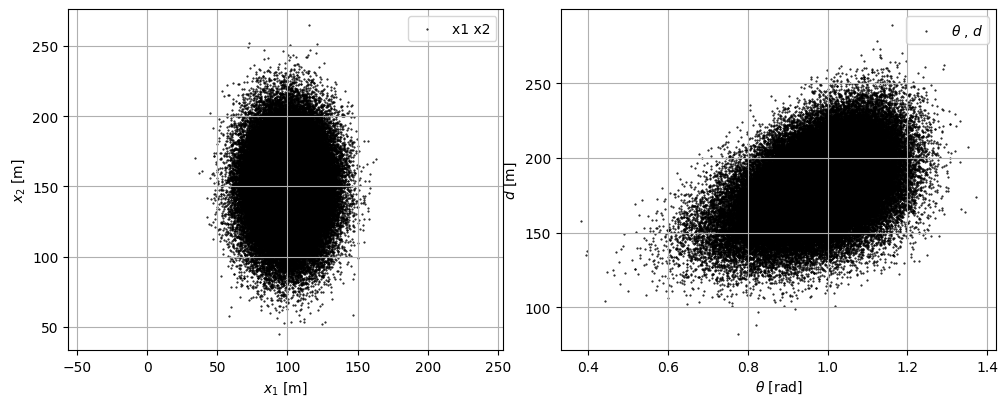

In [24]:
fig1, ax1 = plt.subplots(nrows=1, ncols=2, figsize=(10,4))

fig1.tight_layout()

fig1.tight_layout()

ax1[0].scatter(x1_vec, x2_vec, color='k', s=1, marker='.', label='x1 x2')
ax1[0].set_xlabel('$x_1$ [m]')
ax1[0].set_ylabel('$x_2$ [m]')
ax1[0].axis('equal')
ax1[0].set_title('')
ax1[0].legend()
ax1[0].grid(True)

ax1[1].scatter(theta_vec, d_vec, color='k', s=1, marker='.', label='$\\theta$ , $d$')
ax1[1].set_xlabel('$\\theta$ [rad]')
ax1[1].set_ylabel('$d$ [m]')
# ax1[1].axis('equal')
ax1[1].set_title('')
ax1[1].legend()
ax1[1].grid(True)

In [25]:
# mean values cartesian from simulation
mean_x1_sim = np.mean(x1_vec)
mean_x2_sim = np.mean(x2_vec)

# mean values (polar) from simulation
mean_d_sim = np.mean(d_vec)
mean_theta_sim = np.mean(theta_vec)

# covariance of x1, x2 theory
cov_x1x2_theory = np.array([[std_x1**2, 0], [0, std_x2**2]])

# covariance of x1, x2 from simulation
cov_x1x2_sim = np.cov(x1_vec, x2_vec, ddof=0)

# covariance of theta, d from simulation
cov_theta_d_sim = np.cov(theta_vec, d_vec, ddof=0)

# obtain a factorisation of the simulated covariance matrix (cartesian)
# factorisation (aka 'square root') : (N+kappa) = 3 !
S_mat = np.linalg.cholesky(3*cov_x1x2_sim)

# sigma points
si_pt_0 = np.array([mean_x1, mean_x2])
si_pt_1 = si_pt_0 + S_mat[:,0]
si_pt_2 = si_pt_0 + S_mat[:,1]
si_pt_3 = si_pt_0 - S_mat[:,0]
si_pt_4 = si_pt_0 - S_mat[:,1]

# calculating covariance matrix from sigmal points 
cov_x1x2_from_sigma = (1.0/6) * (np.outer(si_pt_1 - si_pt_0, si_pt_1 - si_pt_0)  \
                   + np.outer(si_pt_2 - si_pt_0, si_pt_2 - si_pt_0) \
                   + np.outer(si_pt_3 - si_pt_0, si_pt_3 - si_pt_0) \
                   + np.outer(si_pt_4 - si_pt_0, si_pt_4 - si_pt_0) )

# print some results
print(f"mean_x1_sim : {mean_x1_sim}; mean_x2_sim : {mean_x2_sim}\n")
print(f"mean_d_sim : {mean_d_sim}; mean_theta_sim : {mean_theta_sim}\n")


print(f"cov_x1x2_theory :\n{cov_x1x2_theory}\n")
print(f"cov_x1x2_sim :\n{cov_x1x2_sim}\n")
print(f"cov_x1x2_from_sigma :\n{cov_x1x2_from_sigma}\n")


mean_x1_sim : 100.00381345477238; mean_x2_sim : 150.03083950463062

mean_d_sim : 181.28437479471586; mean_theta_sim : 0.9771162005997983

cov_x1x2_theory :
[[225.   0.]
 [  0. 625.]]

cov_x1x2_sim :
[[ 2.25348947e+02 -3.79860682e-01]
 [-3.79860682e-01  6.24964416e+02]]

cov_x1x2_from_sigma :
[[ 2.25348947e+02 -3.79860682e-01]
 [-3.79860682e-01  6.24964416e+02]]



**comments**

1) The covariance matrix $\mathbf{P}_{xx}$ (theory) and their equivalent covariance matrices obtained from simulation and sigma points are quite similar. 

2) Even with a large number $N$ of samples the covariance matrices computed from simulation and sigma points have off-diagonal elements.

3) Covariance matrices from simulation and sigma points are almost identical. 

---

The sigma points which have been previously computed are now transformed into polar coordinates.

From these sigma points we compute the mean value of angle $\theta$ and distance $d$ and the covariance matrix $\mathbf{P}_{\theta,d}$.



In [26]:
# transforming sigma points from cartesian to polar

yi_pt_0 = np.array( [math.atan2(si_pt_0[1], si_pt_0[0]), math.sqrt(si_pt_0[0]**2 + si_pt_0[1]**2) ])
yi_pt_1 = np.array( [math.atan2(si_pt_1[1], si_pt_1[0]), math.sqrt(si_pt_1[0]**2 + si_pt_1[1]**2) ])
yi_pt_2 = np.array( [math.atan2(si_pt_2[1], si_pt_2[0]), math.sqrt(si_pt_2[0]**2 + si_pt_2[1]**2) ])
yi_pt_3 = np.array( [math.atan2(si_pt_3[1], si_pt_3[0]), math.sqrt(si_pt_3[0]**2 + si_pt_3[1]**2) ])
yi_pt_4 = np.array( [math.atan2(si_pt_4[1], si_pt_4[0]), math.sqrt(si_pt_4[0]**2 + si_pt_4[1]**2) ])

# compute mean value 
kappa = 1
mean_nl = (1/3)*(kappa*yi_pt_0 + 0.5*(yi_pt_1+yi_pt_2+yi_pt_3+yi_pt_4))
mean_theta_from_sigma_points = mean_nl[0]
mean_d_from_sigma_points = mean_nl[1]

# compute covariance from sigma points

cov_theta_d_from_sigma_points = (1/3)*(kappa*np.outer(yi_pt_0 - mean_nl, yi_pt_0 - mean_nl) + 0.5*(np.outer(yi_pt_1 - mean_nl, yi_pt_1 - mean_nl) + \
                                                                            np.outer(yi_pt_2 - mean_nl, yi_pt_2 - mean_nl) + \
                                                                            np.outer(yi_pt_3 - mean_nl, yi_pt_3 - mean_nl) +
                                                                            np.outer(yi_pt_4 - mean_nl, yi_pt_4 - mean_nl) ) )

# print some results
print(f"mean_theta_from_sigma_points : {mean_theta_from_sigma_points}\n")
print(f"mean_theta_sim : {mean_theta_sim}\n")
print(f"mean_d_from_sigma_points : {mean_d_from_sigma_points}\n")
print(f"mean_d_sim : {mean_d_sim}\n")
print(f"cov_theta_d_from_sigma_points : {cov_theta_d_from_sigma_points}\n")
print(f"cov_theta_d_sim : {cov_theta_d_sim}\n")

mean_theta_from_sigma_points : 0.9768958297791557

mean_theta_sim : 0.9771162005997983

mean_d_from_sigma_points : 181.2649610259141

mean_d_sim : 181.28437479471586

cov_theta_d_from_sigma_points : [[1.13958576e-02 1.06179471e+00]
 [1.06179471e+00 4.93327267e+02]]

cov_theta_d_sim : [[1.11457238e-02 1.03208723e+00]
 [1.03208723e+00 4.96304326e+02]]



**comments**

1) mean values for angle $\theta$ and distance $d$ computed from sigma points are close to their simulated values

2) covariance matrices $\mathbf{P}_{\theta,d}$ computed from sigma points and simulation are a good match

---

To obtain the covariance matrix using linearisation we compute the `Jacobian` matrix $\mathbf{J} $. Then the covariance matrix $\mathbf{P}_{\theta,d}$ is computed.

$$
\mathbf{P}_{\theta,d} = \mathbf{J} \cdot \mathbf{P}_{xx} \cdot \mathbf{J}^T
$$    

In [27]:
J_mat = np.array([ [-mean_x2/(mean_x1**2 + mean_x2**2), mean_x1/(mean_x1**2 + mean_x2**2)], 
                  [mean_x1/math.sqrt(mean_x1**2 + mean_x2**2), mean_x2/math.sqrt(mean_x1**2 + mean_x2**2)]])

In [28]:
cov_theta_d_from_linearisation = J_mat @ cov_x1x2_sim @ J_mat.T

print(f"cov_theta_d_from_linearisation :\n{cov_theta_d_from_linearisation}\n")
print(f"cov_theta_d_from_sigma_points :\n{cov_theta_d_from_sigma_points}\n")
print(f"cov_theta_d_sim :\n{cov_theta_d_sim}\n")

cov_theta_d_from_linearisation :
[[1.07279444e-02 1.02388786e+00]
 [1.02388786e+00 5.01655169e+02]]

cov_theta_d_from_sigma_points :
[[1.13958576e-02 1.06179471e+00]
 [1.06179471e+00 4.93327267e+02]]

cov_theta_d_sim :
[[1.11457238e-02 1.03208723e+00]
 [1.03208723e+00 4.96304326e+02]]



**comments**

In this case the covariance obtained from linearisation does not deviate much from covariances obtained from simulation and sigma points.

---